In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## DATASET
https://www.kaggle.com/datasets/purohitgaurav/plastic-based-textiles-in-clothing-industry

Set de datos del tipo de materia y contaminación por año y empresa de moda.


In [2]:
materials_all= pd.read_csv(r"C:\Users\isabe\Documents\Thebridge\Ejercicios Isa\U2 Data analysis\EDA\temas\moda\Plastic based Textiles in clothing industry.csv")
materials_all

,Company,Product_Type,Production_Year,Greenhouse_Gas_Emissions,Pollutants_Emitted,Water_Consumption,Energy_Consumption,Waste_Generation,Sales_Revenue
0,Zara,Polyester,2020,5000,20,7500,1200,300,500000
1,Zara,Nylon,2019,3000,15,5000,900,200,450000
2,Zara,Recycled_Poly,2021,3500,18,6000,1100,250,480000
3,Zara,Cotton,2018,2000,10,4500,800,180,550000
4,Zara,Synthetic_Blend,2022,6000,25,8000,1500,350,600000
...,...,...,...,...,...,...,...,...,...
6951,Adidas,Tencel,2018,3218,21,7536,902,192,523173
6952,Urban Outfitters,Microfiber,2019,2622,11,5267,952,170,436096
6953,Urban Outfitters,Organic_Cotton,2019,5920,24,4321,982,177,489765
6954,Adidas,Microfiber,2020,2897,16,4125,1085,321,487443


## Análisis preliminar de los datos disponibles

In [3]:
materials_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6956 entries, 0 to 6955
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company                   6956 non-null   object
 1   Product_Type              6956 non-null   object
 2   Production_Year           6956 non-null   int64 
 3   Greenhouse_Gas_Emissions  6956 non-null   int64 
 4   Pollutants_Emitted        6956 non-null   int64 
 5   Water_Consumption         6956 non-null   int64 
 6   Energy_Consumption        6956 non-null   int64 
 7   Waste_Generation          6956 non-null   int64 
 8   Sales_Revenue             6956 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 489.2+ KB


Datos iniciales: 6956 filas y 9 columnas
No falta ningún dato.
Tenemos 7 columnas numéricas y 2 de strings.

In [4]:
materials_all['Company'].value_counts()

Company
Nike                1444
Zara                1396
Urban Outfitters    1390
Adidas              1376
Forever 21          1350
Name: count, dtype: int64

Vamos a filtrar por Zara, para centrarnos en su estudio

In [5]:
marca_mask= materials_all['Company']=='Zara'

materials = materials_all[marca_mask]

materials


,Company,Product_Type,Production_Year,Greenhouse_Gas_Emissions,Pollutants_Emitted,Water_Consumption,Energy_Consumption,Waste_Generation,Sales_Revenue
0,Zara,Polyester,2020,5000,20,7500,1200,300,500000
1,Zara,Nylon,2019,3000,15,5000,900,200,450000
2,Zara,Recycled_Poly,2021,3500,18,6000,1100,250,480000
3,Zara,Cotton,2018,2000,10,4500,800,180,550000
4,Zara,Synthetic_Blend,2022,6000,25,8000,1500,350,600000
...,...,...,...,...,...,...,...,...,...
6923,Zara,Wool,2021,4424,18,6061,1153,277,452754
6937,Zara,Recycled_Poly,2018,4259,16,5575,1125,233,567706
6941,Zara,Cotton,2022,1805,12,4826,938,312,542349
6943,Zara,Synthetic_Blend,2018,2743,11,5458,1466,347,558497


In [6]:
materials['Production_Year'].value_counts()

Production_Year
2021    295
2018    288
2020    282
2022    267
2019    264
Name: count, dtype: int64

De Zara tenemos 1396 filas con datos bien repartidos entre los años 2018 y 2022. Con esto se evaluará la evolución de la marca en términos de:
* Materiales utilizados y su relación con la contaminación y el uso de energía y agua
* Materiales utlizados y su relación con las ventas

In [7]:
materials['Product_Type'].value_counts()

Product_Type
Organic_Cotton     159
Microfiber         134
Polyester          130
Synthetic_Blend    127
Cotton             127
Nylon              126
Recycled_Poly      125
Linen              123
Tencel             123
Wool               116
Viscose            106
Name: count, dtype: int64

Tenemos datos de 11 tipos de fibras diferentes, algunas naturales (Algodón, algodón orgánico, lana...), artificiales (Tencel y viscosa) y otras sintéticas (Polyester, Nylon, Polyester reciclado...)


**Estas son las variables recogidas en el set de datos**


| Columna/Variable | Descripción |
| ---------------- | ----------- |
| Company           | Marca (Zara) |
| Product Type          | Tipo de fibra utilizado en la producción de prendas (11 tipos) |
| Production Year            | Año de producción (2018-2022)|
| Greenhouse Gas Emissions            | Emisiones de efecto invernadero durante la producción |
| Pollutants Emitted           | Emisiones de contaminantes durante la producción|
| Water Consumption          | Consumo de agua  durante la producción|
| Energy Consumption         | Consumo de energía durante la producción|
| Waste Generation          | Generación de residuos durante la producción |
| Sales Revenues           | Ingresos por ventas |

In [8]:
materials.describe().T

,count,mean,std,min,25%,50%,75%,max
Production_Year,1396.0,2019.992120,1.411401,2018.0,2019.00,2020.0,2021.00,2022.0
Greenhouse_Gas_Emissions,1396.0,3853.371777,1215.497990,1800.0,2796.25,3838.5,4891.25,6000.0
Pollutants_Emitted,1396.0,16.985673,4.865629,9.0,13.00,17.0,21.00,25.0
Water_Consumption,1396.0,6002.743553,1141.566792,4000.0,5050.25,5954.0,7025.25,8000.0
Energy_Consumption,1396.0,1107.399713,230.453691,700.0,909.00,1119.5,1307.25,1500.0
Waste_Generation,1396.0,247.063037,57.289020,150.0,196.00,245.0,296.00,350.0
Sales_Revenue,1396.0,510403.888968,51886.353667,420000.0,466913.75,510372.5,555238.50,600000.0


A simple vista no se aprecian outliers ni errores en los datos

* **Clasificación de las variables por tipos**

In [10]:
def card_tipo(df,umbral_categoria = 2, umbral_continua = 30):
    df_temp = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes])
    df_temp = df_temp.T
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"})
    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00
    df_temp["tipo_sugerido"] = "Categorica"
    df_temp.loc[df_temp["Card"] == 2, "tipo_sugerido"] = "Binaria"
    df_temp.loc[(df_temp["Card"] >= umbral_categoria) & (df_temp["Tipo"] != "object"), "tipo_sugerido"] = "Numerica discreta"
    df_temp.loc[df_temp["%_Card"] >= umbral_continua, "tipo_sugerido"] = "Numerica continua"

    return df_temp

In [11]:
card_tipo(materials)

,Card,%_Card,Tipo,tipo_sugerido
Company,1,0.0,object,Categorica
Product_Type,11,0.787966,object,Categorica
Production_Year,5,0.358166,int64,Numerica discreta
Greenhouse_Gas_Emissions,1172,83.954155,int64,Numerica continua
Pollutants_Emitted,17,1.217765,int64,Numerica discreta
Water_Consumption,1192,85.386819,int64,Numerica continua
Energy_Consumption,658,47.13467,int64,Numerica continua
Waste_Generation,200,14.326648,int64,Numerica discreta
Sales_Revenue,1389,99.498567,int64,Numerica continua


<Axes: >

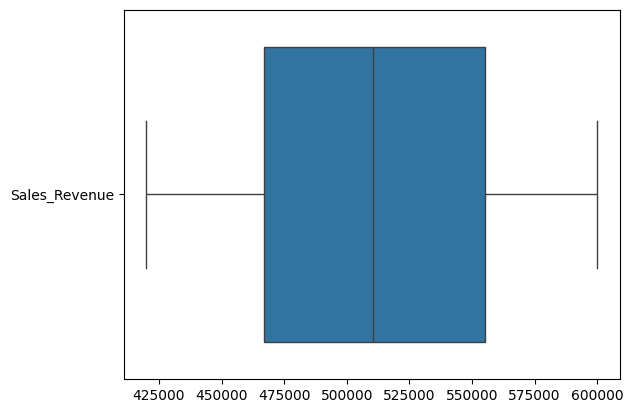

In [112]:
sns.boxplot(data=materials.loc[:,['Sales_Revenue']],orient='h')

<Axes: >

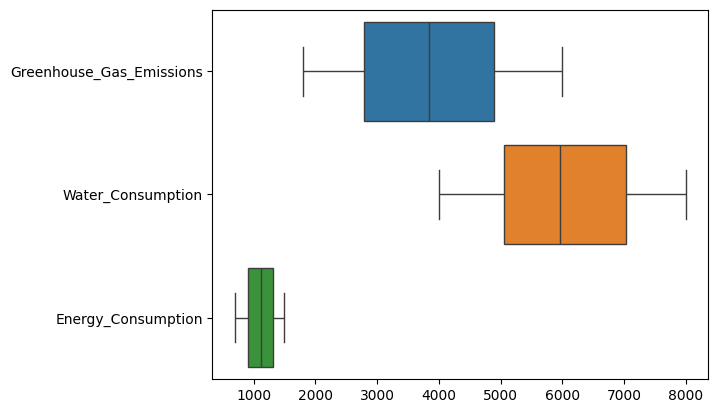

In [111]:
sns.boxplot(data=materials.loc[:,['Greenhouse_Gas_Emissions','Water_Consumption','Energy_Consumption']],orient='h')

### Análisis por marcas y año de:
* Emisiones de efecto invernadero
* Contaminantes emitidos
* Consumo de agua
* Consumo energía
* Evolución de las ventas


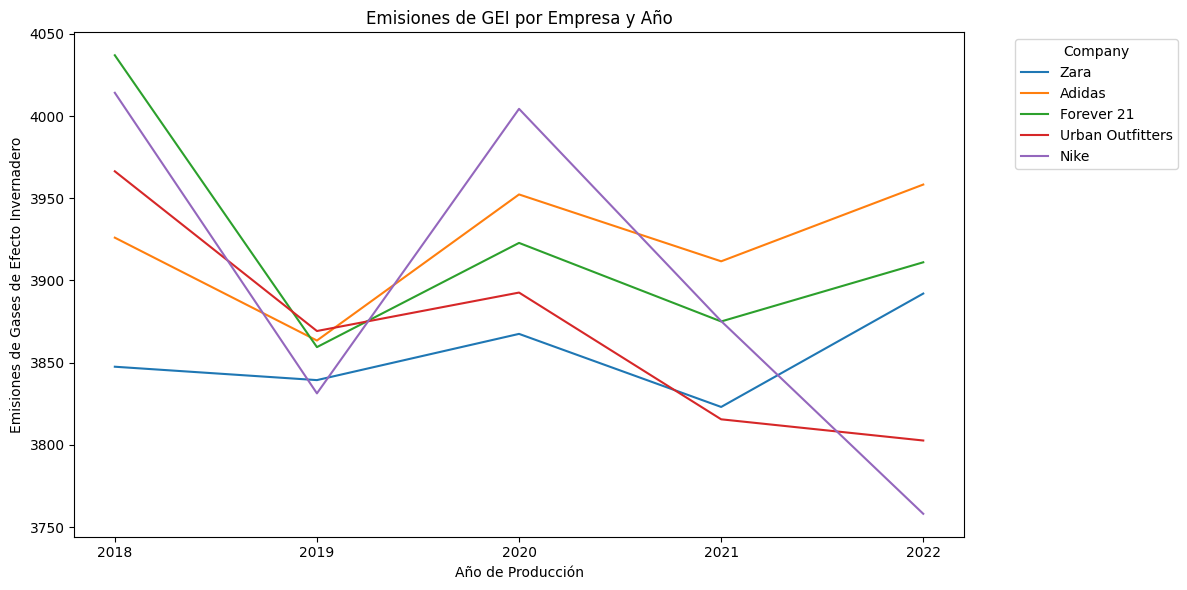

In [20]:
plt.figure(figsize=(12, 6))

ax = sns.lineplot(
    data=materials_all,
    x="Production_Year",
    y="Greenhouse_Gas_Emissions",
    hue="Company",
    ci=None
)

ax.set_xticks(sorted(materials_all["Production_Year"].unique()))

plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Emisiones de GEI por Empresa y Año")
plt.xlabel("Año de Producción")
plt.ylabel("Emisiones de Gases de Efecto Invernadero")

plt.tight_layout()
plt.show()

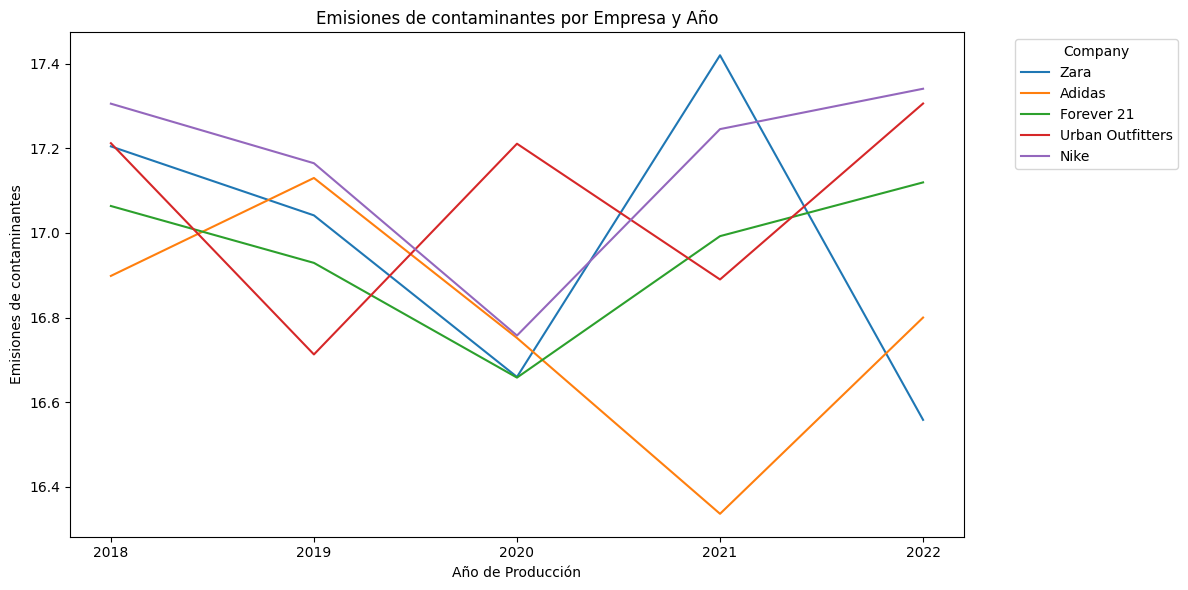

In [21]:
plt.figure(figsize=(12, 6))

ax = sns.lineplot(
    data=materials_all,
    x="Production_Year",
    y="Pollutants_Emitted",
    hue="Company",
    ci=None
)

ax.set_xticks(sorted(materials_all["Production_Year"].unique()))

plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Emisiones de contaminantes por Empresa y Año")
plt.xlabel("Año de Producción")
plt.ylabel("Emisiones de contaminantes")

plt.tight_layout()
plt.show()

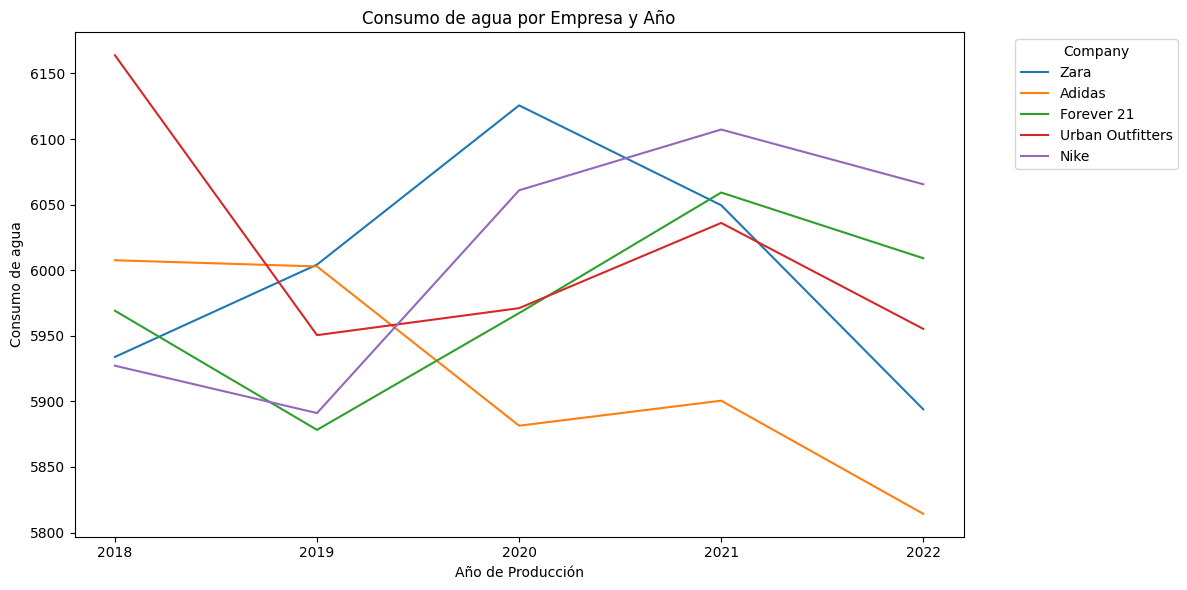

In [23]:
plt.figure(figsize=(12, 6))

ax = sns.lineplot(
    data=materials_all,
    x="Production_Year",
    y="Water_Consumption",
    hue="Company",
    ci=None
)

ax.set_xticks(sorted(materials_all["Production_Year"].unique()))

plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Consumo de agua por Empresa y Año")
plt.xlabel("Año de Producción")
plt.ylabel("Consumo de agua")

plt.tight_layout()
plt.show()

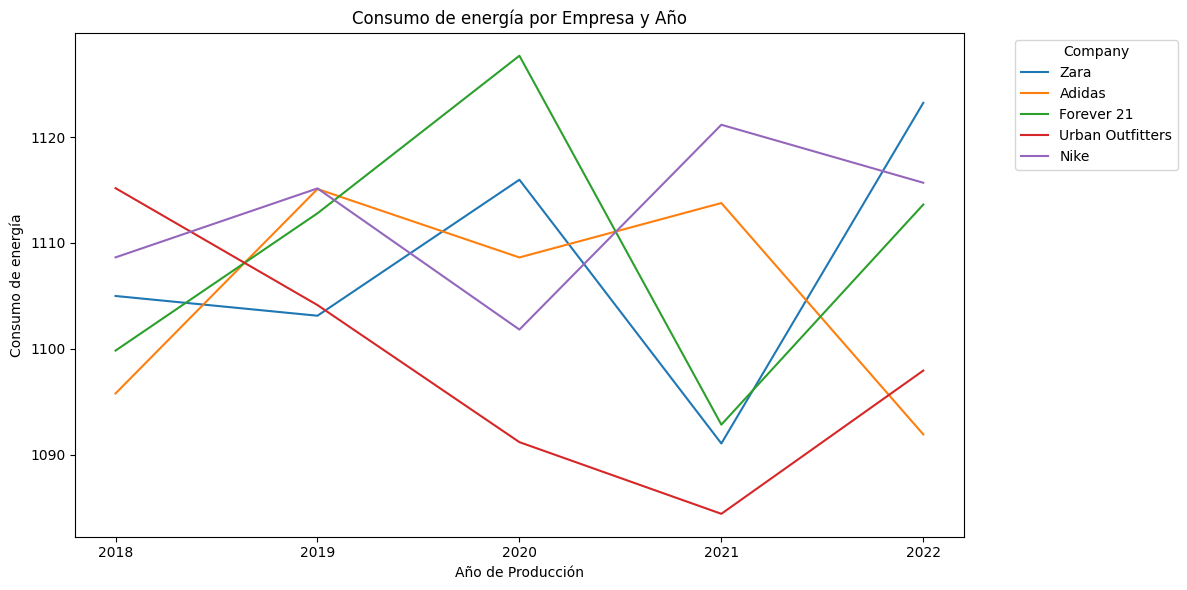

In [24]:
plt.figure(figsize=(12, 6))

ax = sns.lineplot(
    data=materials_all,
    x="Production_Year",
    y="Energy_Consumption",
    hue="Company",
    ci=None
)

ax.set_xticks(sorted(materials_all["Production_Year"].unique()))

plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Consumo de energía por Empresa y Año")
plt.xlabel("Año de Producción")
plt.ylabel("Consumo de energía")

plt.tight_layout()
plt.show()

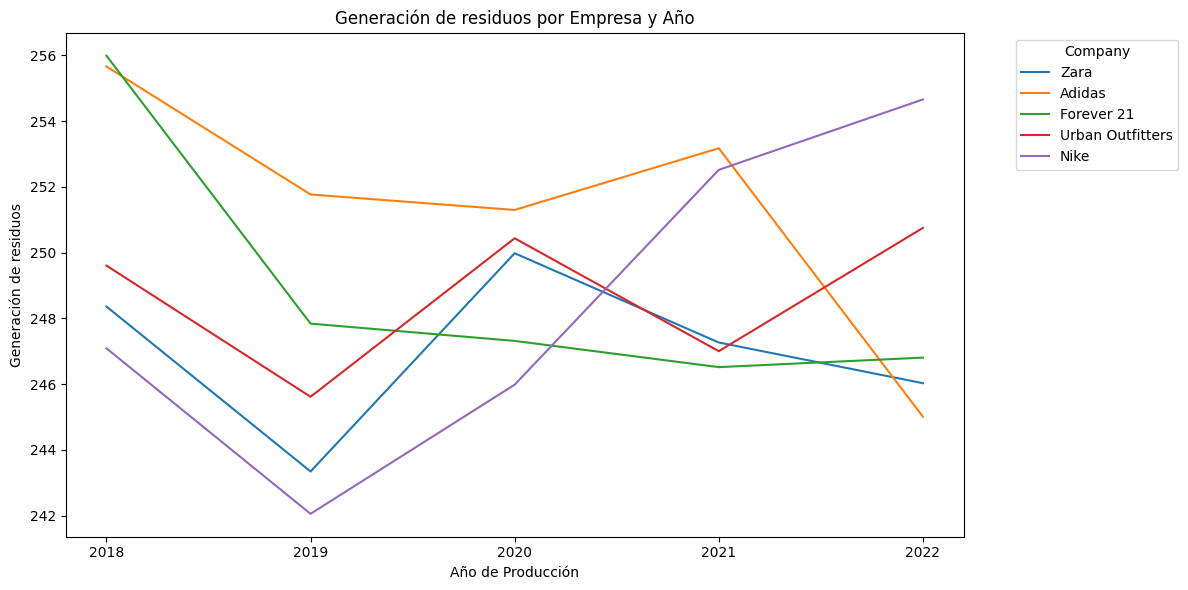

In [36]:
plt.figure(figsize=(12, 6))

ax = sns.lineplot(
    data=materials_all,
    x="Production_Year",
    y="Waste_Generation",
    hue="Company",
    ci=None
)

ax.set_xticks(sorted(materials_all["Production_Year"].unique()))

plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Generación de residuos por Empresa y Año")
plt.xlabel("Año de Producción")
plt.ylabel("Generación de residuos")

plt.tight_layout()
plt.show()

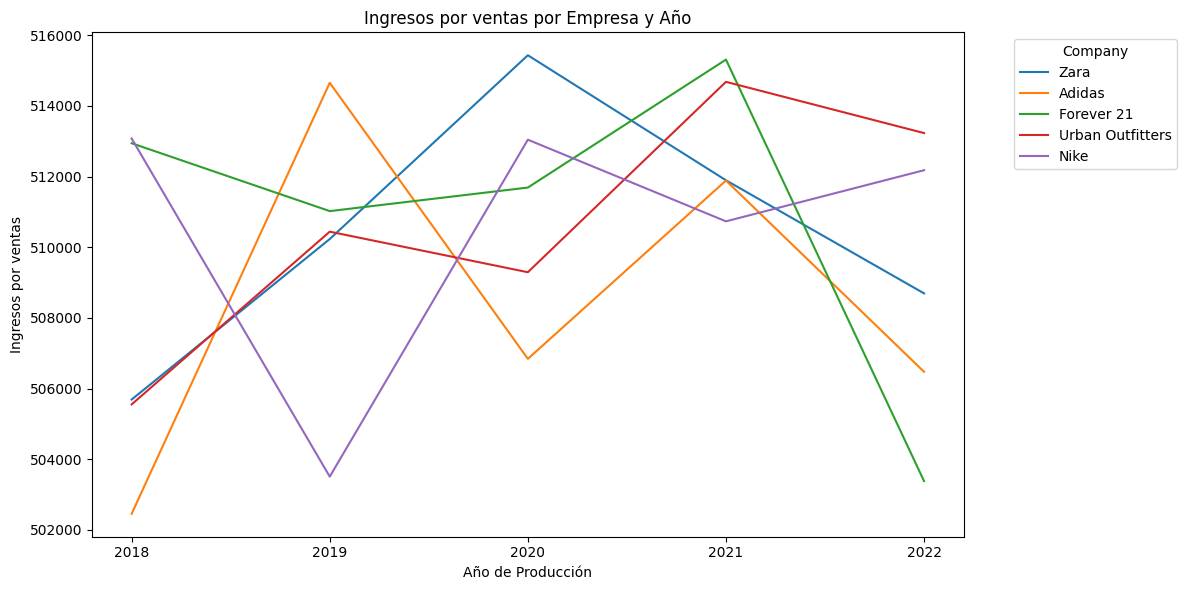

In [26]:
plt.figure(figsize=(12, 6))

ax = sns.lineplot(
    data=materials_all,
    x="Production_Year",
    y="Sales_Revenue",
    hue="Company",
    ci=None
)

ax.set_xticks(sorted(materials_all["Production_Year"].unique()))

plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Ingresos por ventas por Empresa y Año")
plt.xlabel("Año de Producción")
plt.ylabel("Ingresos por ventas")

plt.tight_layout()
plt.show()

### Pasamos a centrarnos en la marca a analizar : **ZARA**

#### *Hipótesis 1*: "Zara ha mejorado ambientalmente entre 2018 y 2022."

Teníamos hecho un dataset con Zara, materials.
Vamos a:
* Agrupar por Production_Year y calcular:
* Agrupamos por materias de GEI y consumo energía
* Agrupamos por de Sales_Revenue

In [54]:
gei =  materials.groupby('Production_Year')['Greenhouse_Gas_Emissions'].sum()
energia =  materials.groupby('Production_Year')['Energy_Consumption'].sum()
residuos =  materials.groupby('Production_Year')['Waste_Generation'].sum()
sales =  materials.groupby('Production_Year')['Sales_Revenue'].sum()

math1= pd.DataFrame({
    'Greenhouse_Gas_Emissions': gei,
    'Energy_Consumption': energia,
    'Waste_Generation': residuos,
    'Sales_Revenue': sales
}).reset_index()

math1

,Production_Year,Greenhouse_Gas_Emissions,Energy_Consumption,Waste_Generation,Sales_Revenue
0,2018,1108090,318237,71528,145638397
1,2019,1013600,291225,64243,134701549
2,2020,1090637,314703,70495,145353050
3,2021,1127806,321863,72944,151009589
4,2022,1039174,299902,65690,135821244


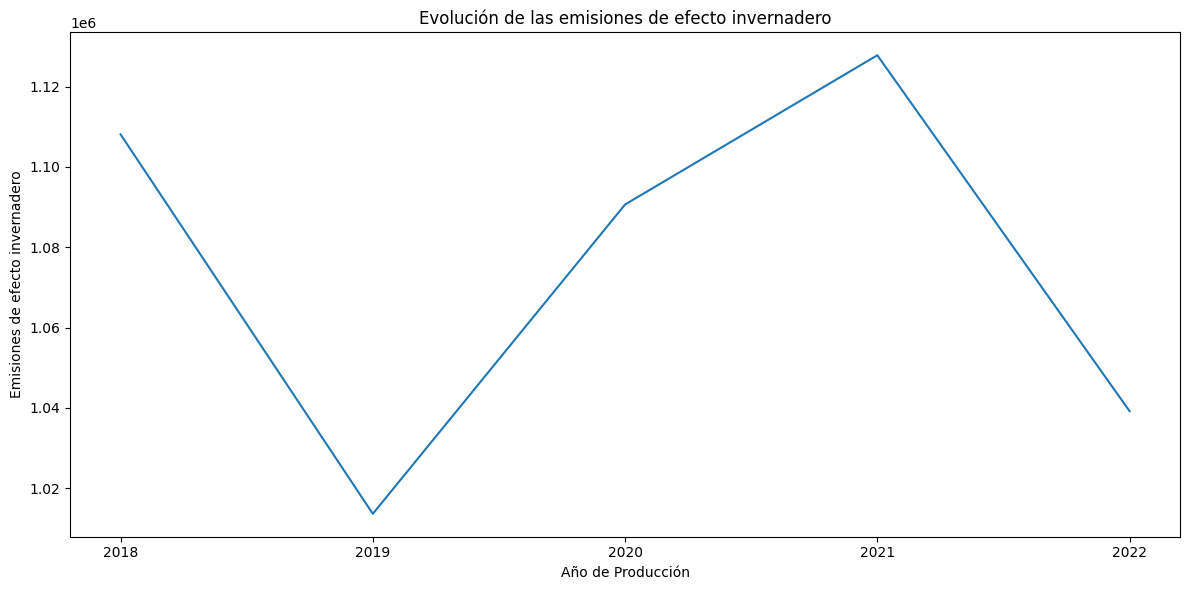

In [59]:
plt.figure(figsize=(12, 6))

ax = sns.lineplot(
    data=math1,
    x="Production_Year",
    y="Greenhouse_Gas_Emissions",
    ci=None
)

ax.set_xticks(sorted(materials_all["Production_Year"].unique()))

plt.title("Evolución de las emisiones de efecto invernadero")
plt.xlabel("Año de Producción")
plt.ylabel("Emisiones de efecto invernadero")

plt.tight_layout()
plt.show()

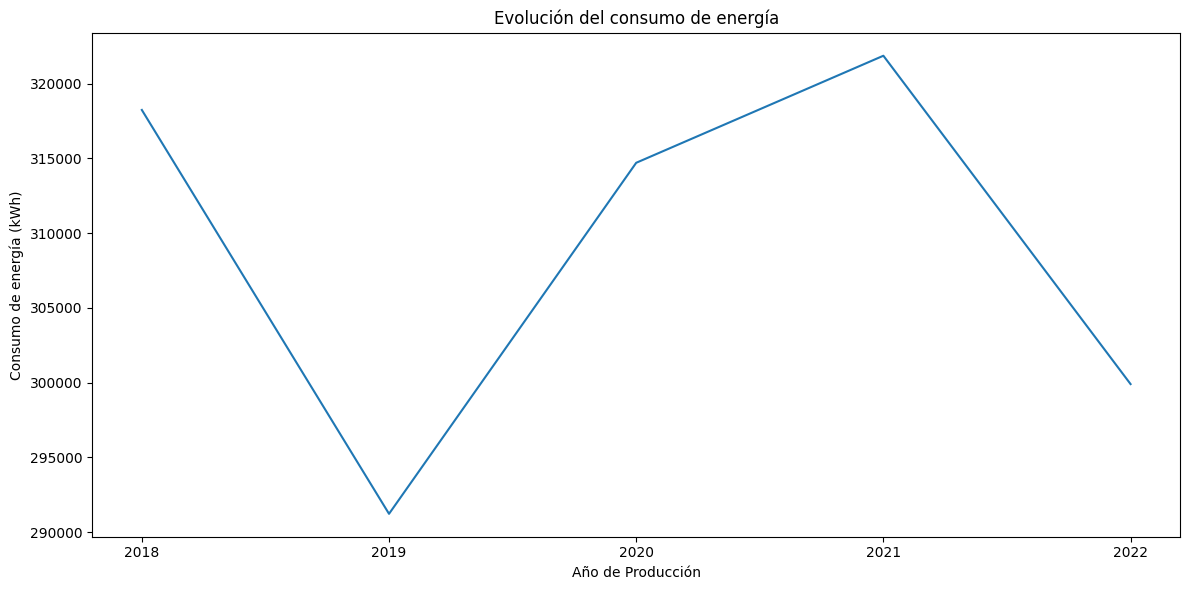

In [61]:
plt.figure(figsize=(12, 6))

ax = sns.lineplot(
    data=math1,
    x="Production_Year",
    y="Energy_Consumption",
    ci=None
)

ax.set_xticks(sorted(materials_all["Production_Year"].unique()))

plt.title("Evolución del consumo de energía")
plt.xlabel("Año de Producción")
plt.ylabel("Consumo de energía (kWh)")

plt.tight_layout()
plt.show()


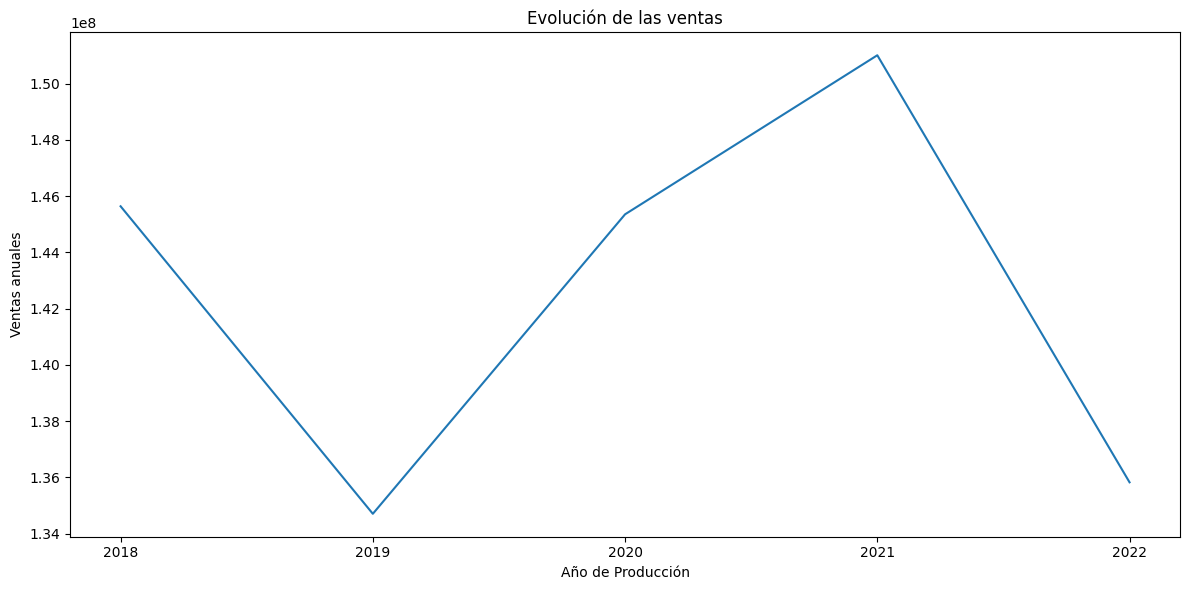

In [63]:
plt.figure(figsize=(12, 6))

ax = sns.lineplot(
    data=math1,
    x="Production_Year",
    y="Sales_Revenue",
    ci=None
)

ax.set_xticks(sorted(materials_all["Production_Year"].unique()))

plt.title("Evolución de las ventas")
plt.xlabel("Año de Producción")
plt.ylabel("Ventas anuales")

plt.tight_layout()
plt.show()

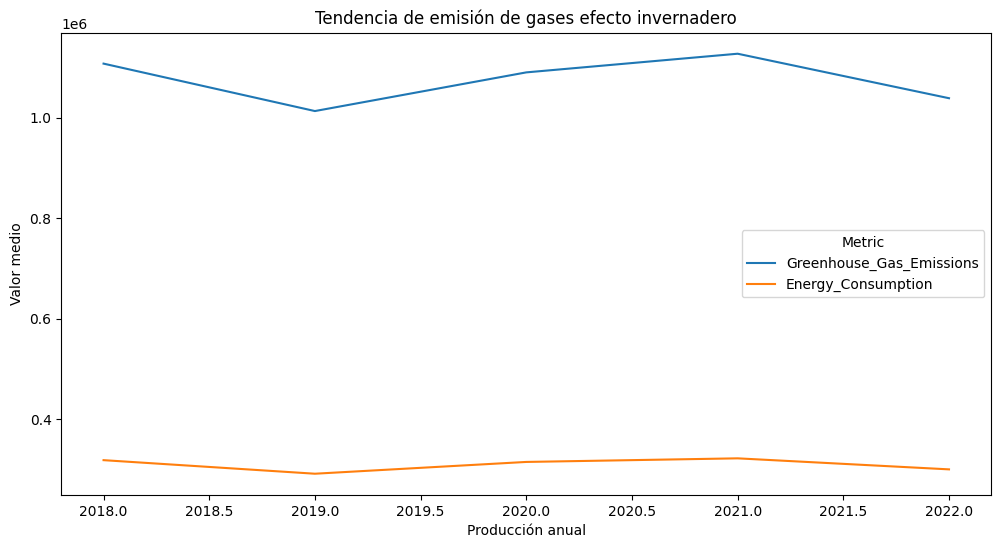

In [120]:
math1melted = math1.melt(id_vars='Production_Year', value_vars=['Greenhouse_Gas_Emissions', 'Energy_Consumption'], var_name='Metric', value_name='Value')

plt.figure(figsize=(12, 6))
sns.lineplot(data=math1melted, x='Production_Year', y='Value', hue='Metric')
plt.xlabel('Producción anual')
plt.ylabel('Valor medio')
plt.title('Tendencia de emisión de gases efecto invernadero')

plt.show()

#### *Hipótesis 2*: "Los materiales naturales son más sostenibles"


* Ranking de productos por eficiencia:
* Menor emisiones / dólar vendido
* Menor agua / dólar vendido


In [81]:
# Efecto invernadero por ventas
materials['Efficiency_GEI_per_Sales'] = materials['Greenhouse_Gas_Emissions'] / (materials['Sales_Revenue'])

ranking_gas = materials.groupby('Product_Type')['Efficiency_GEI_per_Sales'].mean().reset_index()

ranking_gas = ranking_gas.sort_values(by='Efficiency_GEI_per_Sales', ascending=True)

display(ranking_gas)

,Product_Type,Efficiency_GEI_per_Sales
6,Recycled_Poly,0.006920
5,Polyester,0.007231
9,Viscose,0.007340
1,Linen,0.007497
0,Cotton,0.007642
10,Wool,0.007674
8,Tencel,0.007730
4,Organic_Cotton,0.007797
2,Microfiber,0.007937
7,Synthetic_Blend,0.007976


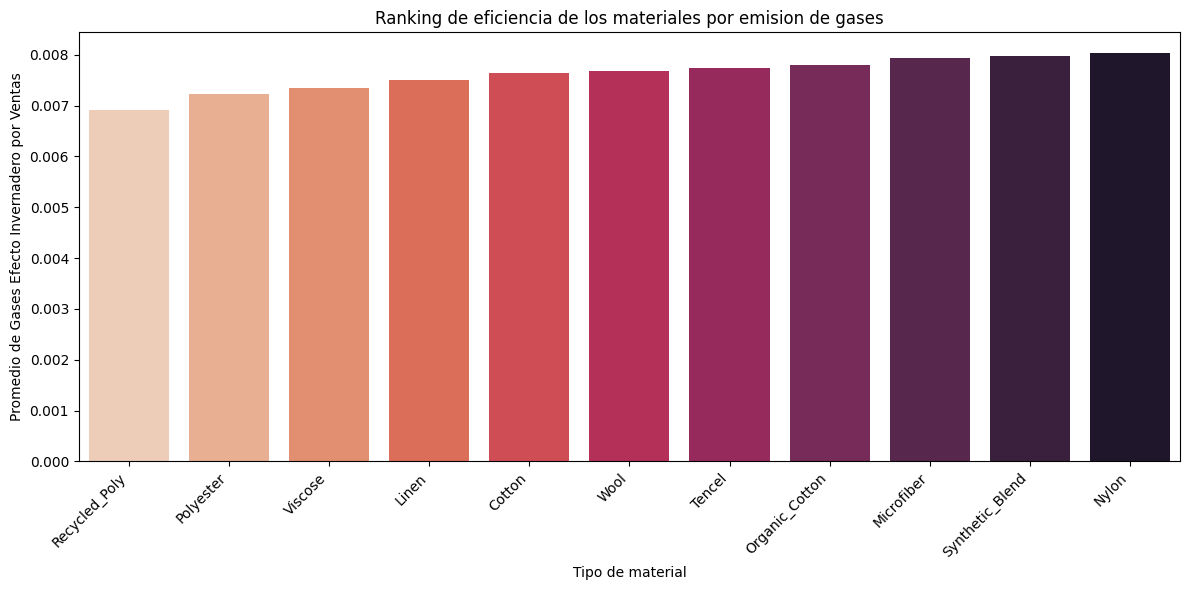

In [82]:
plt.figure(figsize=(12, 6))

sns.barplot(data=ranking_gas, x='Product_Type', y='Efficiency_GEI_per_Sales', palette='rocket_r')

plt.xlabel('Tipo de material')
plt.ylabel('Promedio de Gases Efecto Invernadero por Ventas')
plt.title('Ranking de eficiencia de los materiales por emision de gases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [87]:
#Menor consumo agua / ventas

materials['Efficiency_Water_per_Sales'] = materials['Water_Consumption'] / (materials['Sales_Revenue'])

ranking_water = materials.groupby('Product_Type')['Efficiency_Water_per_Sales'].mean().reset_index()

ranking_water = ranking_water.sort_values(by='Efficiency_Water_per_Sales', ascending=True)

display(ranking_water)


,Product_Type,Efficiency_Water_per_Sales
6,Recycled_Poly,0.011491
5,Polyester,0.011577
8,Tencel,0.011804
9,Viscose,0.011812
10,Wool,0.011822
4,Organic_Cotton,0.011873
1,Linen,0.011989
3,Nylon,0.012023
0,Cotton,0.012033
2,Microfiber,0.012074


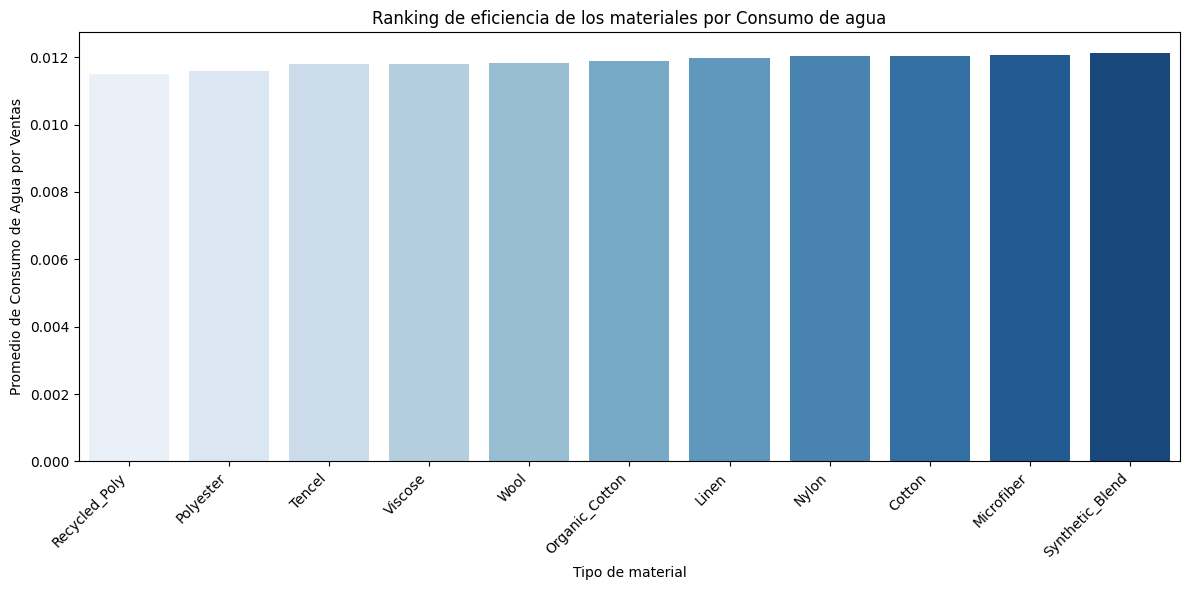

In [88]:
plt.figure(figsize=(12, 6))

sns.barplot(data=ranking_water, x='Product_Type', y='Efficiency_Water_per_Sales', palette='Blues')

plt.xlabel('Tipo de material')
plt.ylabel('Promedio de Consumo de Agua por Ventas')
plt.title('Ranking de eficiencia de los materiales por Consumo de agua')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [91]:
materials.head()

,Company,Product_Type,Production_Year,Greenhouse_Gas_Emissions,Pollutants_Emitted,Water_Consumption,Energy_Consumption,Waste_Generation,Sales_Revenue,Efficiency_GEI_per_Sales,Water_per_Sales,Efficiency_Water_per_Sales
0,Zara,Polyester,2020,5000,20,7500,1200,300,500000,0.010000,0.015000,0.015000
1,Zara,Nylon,2019,3000,15,5000,900,200,450000,0.006667,0.011111,0.011111
2,Zara,Recycled_Poly,2021,3500,18,6000,1100,250,480000,0.007292,0.012500,0.012500
3,Zara,Cotton,2018,2000,10,4500,800,180,550000,0.003636,0.008182,0.008182
4,Zara,Synthetic_Blend,2022,6000,25,8000,1500,350,600000,0.010000,0.013333,0.013333


In [95]:
#evolución del polyester reciclado (el más eficiente en ambos rankings), los centrales en cada ranking, Lana y Algodón orgánico, y los peor parados de cada ranking, nylon y mezcla sintética.

compos_mask = (materials['Product_Type']=='Recycled_Poly') | (materials['Product_Type']=='Organic_Cotton')| (materials['Product_Type']=='Wool')| (materials['Product_Type']=='Nylon')| (materials['Product_Type']=='Synthetic_Blend')

# Apply the mask to filter the DataFrame
math2 = materials[compos_mask]

# Display the resulting DataFrame
display(math2)

,Company,Product_Type,Production_Year,Greenhouse_Gas_Emissions,Pollutants_Emitted,Water_Consumption,Energy_Consumption,Waste_Generation,Sales_Revenue,Efficiency_GEI_per_Sales,Water_per_Sales,Efficiency_Water_per_Sales
1,Zara,Nylon,2019,3000,15,5000,900,200,450000,0.006667,0.011111,0.011111
2,Zara,Recycled_Poly,2021,3500,18,6000,1100,250,480000,0.007292,0.012500,0.012500
4,Zara,Synthetic_Blend,2022,6000,25,8000,1500,350,600000,0.010000,0.013333,0.013333
5,Zara,Organic_Cotton,2019,2500,12,4000,700,150,420000,0.005952,0.009524,0.009524
7,Zara,Recycled_Poly,2020,3800,16,5500,1000,220,510000,0.007451,0.010784,0.010784
...,...,...,...,...,...,...,...,...,...,...,...,...
6908,Zara,Nylon,2022,3564,13,5517,1344,322,524393,0.006796,0.010521,0.010521
6923,Zara,Wool,2021,4424,18,6061,1153,277,452754,0.009771,0.013387,0.013387
6937,Zara,Recycled_Poly,2018,4259,16,5575,1125,233,567706,0.007502,0.009820,0.009820
6943,Zara,Synthetic_Blend,2018,2743,11,5458,1466,347,558497,0.004911,0.009773,0.009773


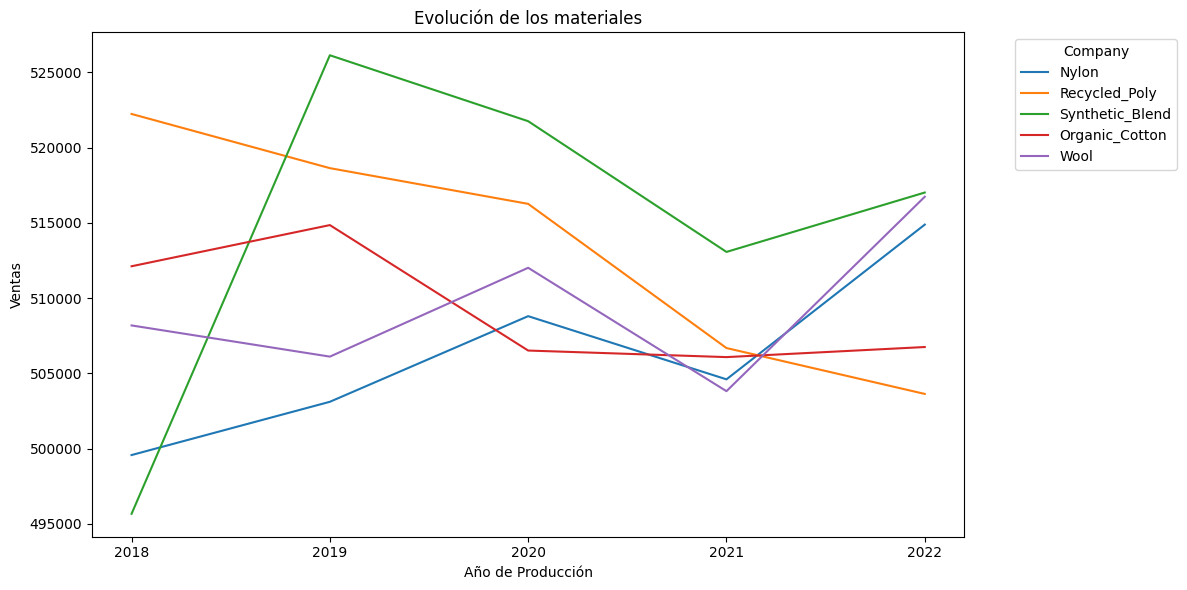

In [97]:
plt.figure(figsize=(12, 6))

ax = sns.lineplot(
    data=math2,
    x="Production_Year",
    y="Sales_Revenue",
    hue="Product_Type",
    ci=None
)

ax.set_xticks(sorted(materials_all["Production_Year"].unique()))

plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Evolución de los materiales")
plt.xlabel("Año de Producción")
plt.ylabel("Ventas")

plt.tight_layout()
plt.show()